In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'sci.space']
data_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)

In [2]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
  cleaned_docs = []
  for doc in docs:
    lemmatized_list = [ lemmatizer.lemmatize (word.lower())
                            for word in doc.split()
                            if word.isalpha() and word not in all_names] 
    cleaned_docs.append(' '.join(lemmatized_list))
  return cleaned_docs 

In [4]:
cleaned_train = clean_text(data_train.data)
label_train = data_train.target

cleaned_test = clean_text(data_test.data)
label_test = data_test.target

len(label_train), len(label_test)

(1177, 783)

In [5]:
from collections import Counter
Counter(label_train)

Counter({0: 584, 1: 593})

In [6]:
Counter(label_test)

Counter({0: 389, 1: 394})

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', max_features=8000)
term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0,random_state=42)
svm.fit(term_docs_train, label_train)

SVC(kernel='linear', random_state=42)

In [9]:
accuracy = svm.score(term_docs_test, label_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 96.4%


In [10]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism','talk.religion.misc','comp.graphics','sci.space','rec.sport.hockey']

data_train = fetch_20newsgroups(subset='train', categories=categories, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=42)

In [11]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
  cleaned_docs = []
  for doc in docs:
    lemmatized_list = [ lemmatizer.lemmatize (word.lower())
                            for word in doc.split()
                            if word.isalpha() and word not in all_names] 
    cleaned_docs.append(' '.join(lemmatized_list))
  return cleaned_docs 

In [13]:
cleaned_train = clean_text(data_train.data)
label_train = data_train.target

cleaned_test = clean_text(data_test.data)
label_test = data_test.target

len(label_train), len(label_test)

(2634, 1752)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', max_features=8000)
term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0,random_state=42)
svm.fit(term_docs_train, label_train)

SVC(kernel='linear', random_state=42)

In [16]:
accuracy = svm.score(term_docs_test, label_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 88.6%


In [17]:
from sklearn.metrics import classification_report
prediction = svm.predict(term_docs_test)
report = classification_report(label_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       319
           1       0.91      0.94      0.93       389
           2       0.98      0.96      0.97       399
           3       0.93      0.93      0.93       394
           4       0.73      0.76      0.74       251

    accuracy                           0.89      1752
   macro avg       0.87      0.87      0.87      1752
weighted avg       0.89      0.89      0.89      1752



In [18]:
import numpy as np
import matplotlib.pyplot as plt
X = np.c_[# negative class
 (.3, -.8),
 (-1.5, -1),
 (-1.3, -.8),
 (-1.1, -1.3),
 (-1.2, -.3),
 (-1.3, -.5),
 (-.6, 1.1),
 (-1.4, 2.2),
 (1, 1),
 # positive class
 (1.3, .8),
 (1.2, .5),
 (.2, -2),
 (.5, -2.4),
 (.2, -2.3),
 (0, -2.7),
 (1.3, 2.1)].T

In [19]:
Y = [-1] * 8 + [1] * 8
gamma_option = [1, 2, 4]

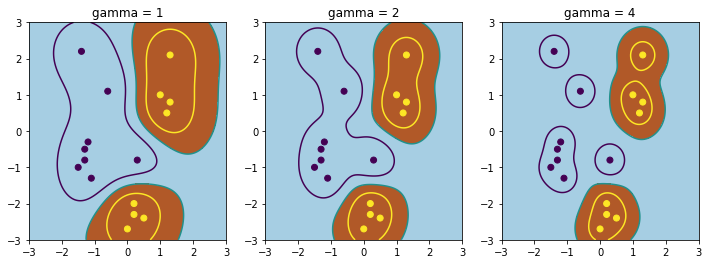

In [20]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4*len(gamma_option), 4))

for i, gamma in enumerate(gamma_option, 1):
 svm = SVC(kernel='rbf', gamma=gamma)
 svm.fit(X, Y)
 plt.subplot(1, len(gamma_option), i)
 plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10)
 XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
 
 Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
 Z = Z.reshape(XX.shape)
 
 plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
 plt.contour(XX, YY, Z, levels=[-.5, 0, .5])
 plt.title('gamma = %d' % gamma)

plt.show()

In [21]:
from sklearn.datasets import fetch_20newsgroups

data_train = fetch_20newsgroups(subset='train', categories=None, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=None, random_state=42)

In [22]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

def clean_text(docs):
  cleaned_docs = []
  for doc in docs:
    lemmatized_list = [ lemmatizer.lemmatize (word.lower())
                            for word in doc.split()
                            if word.isalpha() and word not in all_names] 
    cleaned_docs.append(' '.join(lemmatized_list))
  return cleaned_docs 

In [24]:
cleaned_train = clean_text(data_train.data)
label_train = data_train.target

cleaned_test = clean_text(data_test.data)
label_test = data_test.target

len(label_train), len(label_test)

(11314, 7532)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', max_features=8000)
term_docs_train = tfidf_vectorizer.fit_transform(cleaned_train)
term_docs_test = tfidf_vectorizer.transform(cleaned_test)

In [26]:
from sklearn.svm import SVC
svc_libsvm = SVC(kernel='linear')

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': (1, 10)}
grid_search = GridSearchCV(svc_libsvm, parameters, n_jobs = -1, cv=3)

In [28]:
import timeit
start_time = timeit.default_timer()
grid_search.fit(term_docs_train, label_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 239.904s seconds ---


In [29]:
grid_search.best_params_

{'C': 10}

In [30]:
grid_search.best_score_

0.8666260504741258

In [31]:
svc_libsvm_best = grid_search.best_estimator_
accuracy = svc_libsvm_best.score(term_docs_test, label_test)
print('Test accuracy is {0:.1f}%'.format(accuracy*100))

Test accuracy is 76.2%


In [32]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
 ('tfidf', TfidfVectorizer(stop_words='english')),
 ('svc', SVC(kernel='linear')),
 ])

In [33]:
parameters_pipeline = {
 'tfidf__max_df': (0.25, 0.5),
 'tfidf__max_features': (40000, 50000),
 'tfidf__sublinear_tf': (True, False),
 'tfidf__smooth_idf': (True, False),
 'svc__C': (0.1, 1, 10, 100),
 }

In [34]:
grid_search = GridSearchCV(pipeline, parameters_pipeline, n_jobs=-1, cv=3)
start_time = timeit.default_timer()
grid_search.fit(cleaned_train, label_train)
print("--- %0.3fs seconds ---" %(timeit.default_timer() - start_time))

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
pipeline_best = grid_search.best_estimator_

In [ ]:
accuracy = pipeline_best.score(cleaned_test, label_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

In [ ]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls --output CTG.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1703k  100 1703k    0     0  1663k      0  0:00:01  0:00:01 --:--:-- 1663k


In [ ]:
! ls 

CTG.xls  sample_data


In [ ]:
import pandas as pd
df = pd.read_excel('CTG.xls', "Raw Data")

In [ ]:
X = df.iloc[1:2126, 3:-2].values
Y = df.iloc[1:2126, -1].values

In [ ]:
from collections import Counter
Counter(Y)

Counter({1.0: 1654, 2.0: 295, 3.0: 176})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import timeit

svc = SVC(kernel='rbf')
parameters = {'C': (100, 1e3, 1e4, 1e5),
 'gamma': (1e-08, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=3)

start_time = timeit.default_timer()
grid_search.fit(X_train, Y_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

--- 12.460s seconds ---


In [ ]:
grid_search.best_params_

{'C': 100000.0, 'gamma': 1e-07}

In [ ]:
grid_search.best_score_

0.9447061902892292

In [ ]:
svc_best = grid_search.best_estimator_

In [ ]:
accuracy = svc_best.score(X_test, Y_test)
print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 95.5%


In [ ]:
from sklearn.metrics import classification_report

prediction = svc_best.predict(X_test)
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       324
         2.0       0.89      0.91      0.90        65
         3.0       1.00      0.78      0.88        36

    accuracy                           0.96       425
   macro avg       0.95      0.89      0.92       425
weighted avg       0.96      0.96      0.95       425

